In [ ]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from numpy import savetxt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import FastICA

import keras
import tensorflow as tf 
from keras.callbacks import Callback
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import math, time
import itertools
from math import sqrt

np.random.seed(0)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Demo Day Digitalent/Dataset Cuaca.csv", header=0, parse_dates=['dt_iso'], index_col='dt_iso', squeeze=True)
df

,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1990-01-01,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1990-01-01,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
1990-01-01,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
1990-01-01,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-07,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,4.10,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2020-01-07,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,5.70,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2020-01-07,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,83,6.70,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n


In [ ]:
dataset = df.drop(columns=['timezone','city_name', 'wind_deg', 'rain_1h',	'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h',	'rain_today', 'snow_1h', 'lat','lon','temp_min','temp_max', 'snow_3h','snow_6h','snow_12h','snow_24h',	'snow_today',	'clouds_all', 'weather_id',	'weather_main', 'weather_description',	'weather_icon'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264924 entries, 1990-01-01 to 2020-01-07
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   temp        264924 non-null  float64
 1   pressure    264924 non-null  float64
 2   humidity    264924 non-null  int64  
 3   wind_speed  264924 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 10.1 MB


In [ ]:
# Kelas Kecepatan Angin 
# Tenang, Teduh, Sepoi, Kuat 

tenang = 0
teduh = 0 
sepoi = 0 
kuat = 0 

data = dataset['wind_speed']
for i in range(len(data)):
  if(data[i] >= 0 and data[i] <= 2.75):
    tenang = tenang + 1
  elif(data[i] >= 2.76 and data[i] <=  5.5):
    teduh = teduh + 1
  elif(data[i] >=  5.6 and data[i] <= 8.25):
    sepoi = sepoi + 1
  elif(data[i] > 8.26):
    kuat = kuat + 1

In [ ]:
print("Tenang : ", tenang)
print("Teduh : ", teduh)
print("Sepoi : ", sepoi)
print("Kuat :", kuat)

Tenang :  101202
Teduh :  121070
Sepoi :  38152
Kuat : 3788


In [ ]:
# Mengelompokkan data setiap 1 hari
dataset2 = dataset.copy()
ekstraksi = dataset2.resample('1D').mean()
ekstraksi.describe()
#print(ekstraksi)
ekstraksi.to_csv('contoh hasil ekstraksi.csv')

In [ ]:
MinMax_scaler = preprocessing.MinMaxScaler()
ekstraksi['temp'] = MinMax_scaler.fit_transform(ekstraksi['temp'].values.reshape(-1,1))
ekstraksi['pressure'] = MinMax_scaler.fit_transform(ekstraksi['pressure'].values.reshape(-1,1))
ekstraksi['humidity'] = MinMax_scaler.fit_transform(ekstraksi['humidity'].values.reshape(-1,1))
ekstraksi['wind_speed'] = MinMax_scaler.fit_transform(ekstraksi['wind_speed'].values.reshape(-1,1))

In [ ]:
ekstraksi

,temp,pressure,humidity,wind_speed
dt_iso,,,,
1990-01-01,0.439979,0.515715,0.650867,0.040684
1990-01-02,0.353363,0.536668,0.709827,0.093336
1990-01-03,0.509673,0.468570,0.563006,0.095496
1990-01-04,0.474104,0.429282,0.626590,0.140571
1990-01-05,0.619738,0.426663,0.464740,0.162028
...,...,...,...,...
2020-01-03,0.700993,0.376899,0.600000,0.401317
2020-01-04,0.635728,0.306181,0.672832,0.597833
2020-01-05,0.733625,0.379518,0.672832,0.395085


In [ ]:
ekstraksi.shape

(10964, 4)

In [ ]:
#segmentasi
ekstraksi = ekstraksi.values
n = 0
n2 = 0
n3 = 0
n4 = 0
num = 0
segmen = np.empty(shape=(len(ekstraksi) - 11, 4, 12))
col2 = 0
col3 = 0
col4 = 0
col5 = 0

In [ ]:
len(ekstraksi)

10964

In [ ]:
for row in range(len(ekstraksi) - 12):
  for col in range(48):
    if (num >= 0 and num <= 11) :
      segmen[row][0][col2] = round(ekstraksi[row + n][0], 2)
      num = num + 1
      n = n + 1
      col2 = col2 + 1
    elif (num >= 12 and num <= 23) :
      n = 0
      col2 = 0
      segmen[row][1][col3] = round(ekstraksi[row + n2][1], 2)
      num = num + 1
      n2 = n2 + 1
      col3 = col3 + 1
    elif (num >= 24 and num <= 35) :
      n2 = 0
      col3 = 0
      segmen[row][2][col4] = round(ekstraksi[row + n3][2], 2)
      num = num + 1
      n3 = n3 + 1
      col4 = col4 + 1
    elif (num >= 36) :
      n3 = 0
      col4 = 0
      segmen[row][3][col5] = round(ekstraksi[row + n4][3], 2)
      num = num + 1
      n4 = n4 + 1
      col5 = col5 + 1
  n4 = 0
  num = 0
  col5 = 0

In [ ]:
print(segmen.shape)

(10953, 4, 12)


In [ ]:
train = segmen 
X_train = train[:, :-1]
y_train = train[:, :-1][:,-1] 
print('Training set:', train.shape[0], 'obs')
X_train.shape

Training set: 10953 obs


(10953, 3, 12)

In [ ]:
train = segmen 
X_train_2 = train[:, :-1]
y_train_2 = train[:, :-1][:,-1] 
print('Training set:', train.shape[0], 'obs')
X_train_2.shape

Training set: 10953 obs


(10953, 3, 12)

In [ ]:
# ica = ICA(n_components=15, random_state=97)
ica = FastICA(n_components =15, whiten=True, max_iter=1000,tol=0.0001)
ica.fit(X_train_2.reshape(X_train_2.shape[0], X_train_2.shape[1]*X_train_2.shape[2]))
x_train_ica = ica.fit_transform(X_train_2.reshape(X_train_2.shape[0], X_train_2.shape[1]*X_train_2.shape[2]))
x_train_ica_restored = ica.inverse_transform(x_train_ica)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


In [ ]:
X_train_2.shape
print(X_train_2.shape)
x_train_ica.shape

(10953, 3, 12)


(10953, 15)

In [ ]:
#split data latih dan tes
splitRow = round(0.9 * x_train_ica.shape[0])
splitRow

9858

In [ ]:
# Training (80%)
train = segmen[:int(splitRow), :]
X_train_2 = train[:, :-1] # 12W data
y_train_2 = train[:, :-1][:,-1]
print('Training set:', train.shape[0])

# Test (20%)
test = segmen[int(splitRow):, :]
X_test_2 = test[:, :-1] # 12W data
y_test_2 = test[:, :-1][:,-1] 
print('Test set:', test.shape[0])

Training set: 9858
Test set: 1095


In [ ]:
print(X_train_2.shape)
print(X_test_2.shape) 
print(len(y_train_2))
print('Size X Train :', X_train_2.shape)

(9858, 3, 12)
(1095, 3, 12)
9858
Size X Train : (9858, 3, 12)


In [ ]:
X_train_2 = X_train.copy()
y_train_2 = y_train.copy()

In [ ]:
X_train_2.shape

(10953, 3, 12)

In [ ]:
y_train_2.shape

(10953, 12)

In [ ]:
model = Sequential()
model15IC = Sequential()
model20IC = Sequential()
lengthX = len(X_train_2[1])

In [ ]:
#model
neurons = [128, 64, 64, 64]
dropout = 0.2
decay = 0.2

In [ ]:
#Callback
callback = EarlyStopping(
    #code here (contains at least : monitor, patience, restore_best_weights)
    monitor = 'val_loss',
    min_delta = 0,
    patience = 3,
    verbose = 1,
    restore_best_weights = True
)

PERCOBAAN MENGGUNAKAN MODEL OPTIMASI SGD 

In [ ]:
#1dCNN1
#size 48*1
model.add(Convolution1D(neurons[0], 2, strides=1, padding='same', activation='relu', input_shape=(X_train[0].shape)))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 24*1
#1dCNN2
model.add(Convolution1D(neurons[1], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 12*1
#1dCNN3
model.add(Convolution1D(neurons[2], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(12, activation='sigmoid'))

#compile model
adam = tf.optimizers.Adam(learning_rate=0.0001)
sgd = tf.optimizers.SGD(learning_rate=0.001)
adadelta = tf.optimizers.Adadelta(learning_rate=0.0001)
model.compile(loss='mse',optimizer='sgd', metrics=['accuracy'])

count = time.time()
history10IC = model.fit(X_train, y_train, batch_size = 60, epochs = 500, validation_data=(X_test, y_test),callbacks=callback, verbose = 1)

print(history10IC.history.keys())
plt.figure(1)

# Calculate loss and accuracy
score = model.evaluate(X_test,y_test)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1]*100.0)


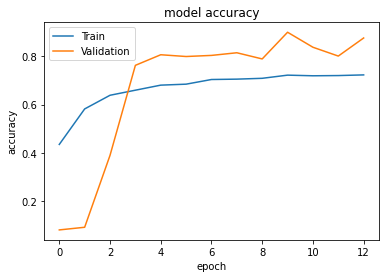

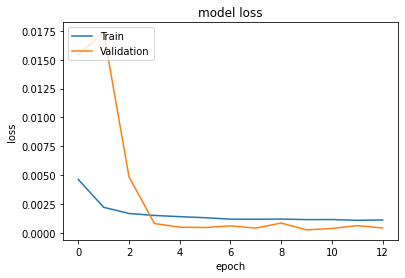

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history10IC.history['accuracy'])
plt.plot(history10IC.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10IC.history['loss'])
plt.plot(history10IC.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

PERCOBAAN MENGGUNAKAN MODEL ADAM

In [ ]:
#1dCNN1
#size 48*1
model.add(Convolution1D(neurons[0], 2, strides=1, padding='same', activation='relu', input_shape=(X_train_2[0].shape)))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 24*1
#1dCNN2
model.add(Convolution1D(neurons[1], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 12*1
#1dCNN3
model.add(Convolution1D(neurons[2], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(12, activation='sigmoid'))

#compile model
adam = tf.optimizers.Adam(learning_rate=0.01)
sgd = tf.optimizers.SGD(learning_rate=0.001)
adadelta = tf.optimizers.Adadelta(learning_rate=0.0001)
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

count = time.time()
history10IC = model.fit(X_train_2, y_train_2, batch_size = 60, epochs = 500, validation_data=(X_test_2, y_test_2),callbacks=callback, verbose = 1)

print(history10IC.history.keys())
plt.figure(1)

# Calculate loss and accuracy
score = model.evaluate(X_test_2,y_test_2)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1]*100.0)


Epoch 1/500
183/183 [==============================] - 3s 10ms/step - loss: 0.0043 - accuracy: 0.4612 - val_loss: 0.0140 - val_accuracy: 0.1041
Epoch 2/500
183/183 [==============================] - 2s 8ms/step - loss: 0.0021 - accuracy: 0.6115 - val_loss: 0.0101 - val_accuracy: 0.1087
Epoch 3/500
183/183 [==============================] - 2s 9ms/step - loss: 0.0016 - accuracy: 0.6465 - val_loss: 0.0022 - val_accuracy: 0.4877
Epoch 4/500
183/183 [==============================] - 2s 8ms/step - loss: 0.0015 - accuracy: 0.6735 - val_loss: 8.2469e-04 - val_accuracy: 0.7708
Epoch 5/500
183/183 [==============================] - 2s 9ms/step - loss: 0.0013 - accuracy: 0.6825 - val_loss: 7.5249e-04 - val_accuracy: 0.7626
Epoch 6/500
183/183 [==============================] - 2s 8ms/step - loss: 0.0013 - accuracy: 0.7029 - val_loss: 8.4372e-04 - val_accuracy: 0.8037
Epoch 7/500
183/183 [==============================] - 2s 8ms/step - loss: 0.0012 - accuracy: 0.7089 - val_loss: 3.6323e-04 - val

<Figure size 432x288 with 0 Axes>

In [ ]:
X_test_2[0]

array([[0.62, 0.54, 0.66, 0.45, 0.65, 0.56, 0.56, 0.62, 0.68, 0.75, 0.76,
        0.71],
       [0.43, 0.43, 0.42, 0.42, 0.37, 0.4 , 0.36, 0.35, 0.32, 0.27, 0.27,
        0.3 ],
       [0.42, 0.62, 0.38, 0.68, 0.48, 0.6 , 0.59, 0.55, 0.56, 0.44, 0.43,
        0.46]])

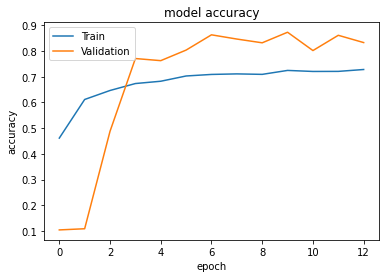

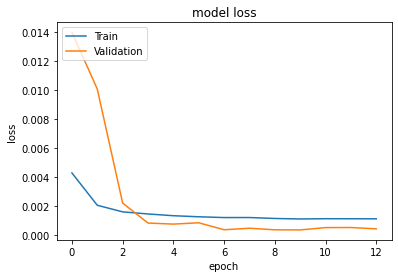

In [ ]:
# FIX SETTING
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history10IC.history['accuracy'])
plt.plot(history10IC.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10IC.history['loss'])
plt.plot(history10IC.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

PERCOBAAN MENGGUNAKAN MODEL ADADELTA

In [ ]:
#1dCNN1
#size 48*1
model.add(Convolution1D(neurons[0], 2, strides=1, padding='same', activation='relu', input_shape=(X_train_2[0].shape)))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 24*1
#1dCNN2
model.add(Convolution1D(neurons[1], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

#size 12*1
#1dCNN3
model.add(Convolution1D(neurons[2], 2, strides=1, padding='same', activation='relu'))

#pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(12, activation='sigmoid'))

#compile model
adam = tf.optimizers.Adam(learning_rate=0.0001)
sgd = tf.optimizers.SGD(learning_rate=0.001)
adadelta = tf.optimizers.Adadelta(learning_rate=0.0001)
model.compile(loss='mse',optimizer='adadelta', metrics=['accuracy'])

count = time.time()
history10IC = model.fit(X_train_2, y_train_2, batch_size = 60, epochs = 500, validation_data=(X_test_2, y_test_2),callbacks=callback, verbose = 1)

print(history10IC.history.keys())
plt.figure(1)

# Calculate loss and accuracy
score = model.evaluate(X_test_2,y_test_2)
print("Test Loss : ",score[0])
print("Test Accuracy : ",score[1]*100.0)


Epoch 1/500
183/183 [==============================] - 5s 13ms/step - loss: 93.3224 - accuracy: 0.0782 - val_loss: 932.9510 - val_accuracy: 0.0776
Epoch 2/500
183/183 [==============================] - 1s 8ms/step - loss: 93.3247 - accuracy: 0.0745 - val_loss: 932.9629 - val_accuracy: 0.0776
Epoch 3/500
183/183 [==============================] - 1s 8ms/step - loss: 93.3107 - accuracy: 0.0789 - val_loss: 932.9660 - val_accuracy: 0.0840
Epoch 4/500
183/183 [==============================] - 1s 8ms/step - loss: 93.3210 - accuracy: 0.0780 - val_loss: 932.9651 - val_accuracy: 0.0968
Epoch 4: early stopping
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
35/35 [==============================] - 0s 2ms/step - loss: 932.9512 - accuracy: 0.0776
Test Loss :  932.951171875
Test Accuracy :  7.7625572681427


<Figure size 432x288 with 0 Axes>